In [3]:
import sqlite3

conn = sqlite3.connect("C:/Users/louis/datatech/Database/walmart_fraudes.db")
cursor = conn.cursor()

query = """
SELECT o.driver_id,
       COUNT(DISTINCT m.order_id) AS falhas,
       COUNT(DISTINCT o.order_id) AS total_entregas,
       ROUND(CAST(COUNT(DISTINCT m.order_id) AS FLOAT)/COUNT(DISTINCT o.order_id), 2) AS taxa_falha
FROM orders o
LEFT JOIN missing_items m ON o.order_id = m.order_id
GROUP BY o.driver_id
ORDER BY taxa_falha DESC
LIMIT 10;
"""
df_fraudes_por_entregador = pd.read_sql_query(query, conn)
df_fraudes_por_entregador



,driver_id,falhas,total_entregas,taxa_falha
0,WDID10545,4,11,0.36
1,WDID10544,4,11,0.36
2,WDID10543,4,11,0.36
3,WDID10542,4,11,0.36
4,WDID10541,4,11,0.36
5,WDID10540,4,11,0.36
6,WDID10539,4,11,0.36
7,WDID10538,4,11,0.36
8,WDID10537,4,11,0.36
9,WDID10536,4,11,0.36


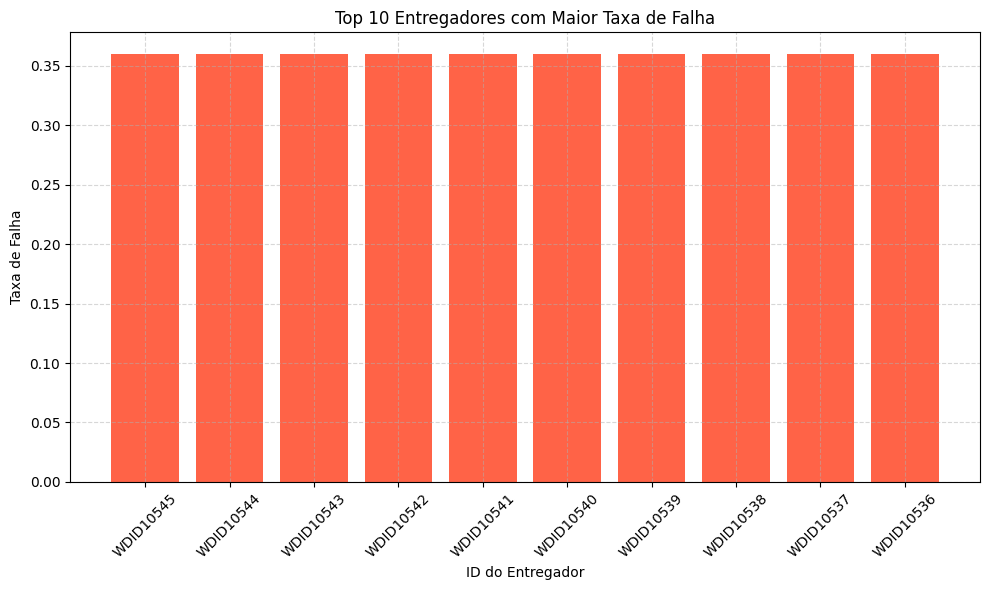

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df_fraudes_por_entregador['driver_id'].astype(str), df_fraudes_por_entregador['taxa_falha'], color='tomato')
plt.xlabel('ID do Entregador')
plt.ylabel('Taxa de Falha')
plt.title('Top 10 Entregadores com Maior Taxa de Falha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
